# Библиотеки

In [22]:
from zlib import crc32

import numpy as np
import pandas as pd
import scipy.stats as st
import networkx as nx
import re

import collections.abc
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping
from causalgraphicalmodels import CausalGraphicalModel

# Код генерации выборки

In [2]:
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    g = nx.DiGraph(nodes=[str(i) for i in range(5)])
    edges = []
    for i in range(5):
        for j in range(5):
            if i == j:
                continue
            if rs.uniform() > 0.35:
                g.add_edge(str(i),str(j))
                if not nx.is_directed_acyclic_graph(g):
                    g.remove_edge(str(i),str(j))
                else:
                    edges.append((str(i), str(j)))

    edges = [[int(a[0]), int(a[1])] for a in edges]
    edges = np.array(edges).astype(np.uint32)
    return edges

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [3]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task

Enter your mail: bogdanov.ai@phystech.edu


{'mail': 'bogdanov.ai@phystech.edu',
 'id': 1162440694,
 'data': array([[0, 1],
        [0, 3],
        [0, 4],
        [1, 3],
        [2, 1],
        [2, 3],
        [3, 4]], dtype=uint32)}

# Работа с выборкой

In [4]:
data = task['data']

In [5]:
edges = [tuple(tuple(map(str, x))) for x in data]
edges

[('0', '1'),
 ('0', '3'),
 ('0', '4'),
 ('1', '3'),
 ('2', '1'),
 ('2', '3'),
 ('3', '4')]

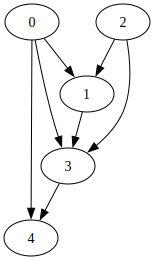

In [16]:
G = CausalGraphicalModel(nodes=['0', '1', '2', '3', '4'], edges=edges)
G.draw()

## Количество цепочек (из 3 вершин) внутри графа

Как видно: 4.

## Количество вилок внутри графа

Как видно: 4.

## Количество коллайдеров внутри графа

Как видно: 5.